Some typical NumPy 'random' functions:

In [1]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2))  # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5))  # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10))  # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3))  # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1,
                       size=10))  # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(
    42))  # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

[[0.05336073 0.36586099]
 [0.52006818 0.99048518]
 [0.26539596 0.57567047]]
[-0.00729609 -0.44121991 -1.2764752   0.43642241 -1.53535156]
[13 36 88 70 39  6 37 58 42 59]
[8 5 1]
[ 1.57044047 -0.54081412 -0.36314884 -0.14763821 -0.01962757 -1.83103051
 -1.11871667 -0.79375666  0.57966942  1.59857239]
None


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [2]:
import pandas as pd
import time

In [3]:
data_size = 1_000_000

1

In [4]:
pd_start_time = time.time()
series = pd.Series(pd.Series(range(1, 101)).sample(data_size, replace=True).values)
pd_end_time = time.time()

df = pd.DataFrame(series, columns=['RandomNumbers'])

pd_time_consumed = pd_end_time - pd_start_time

df.head()

,RandomNumbers
0,52
1,93
2,15
3,72
4,61


2

In [5]:
np.random.seed(42)

np_start_time = time.time()
ndarray = np.random.randint(1, 101, size=data_size)
np_end_time = time.time()

np_time_consumed = np_end_time - np_start_time

ndarray

array([52, 93, 15, ..., 62, 78, 53], dtype=int32)

3

In [6]:
print(f'Pandas: {pd_time_consumed} seconds\nNumpy: {np_time_consumed} seconds')

Pandas: 0.030515432357788086 seconds
Numpy: 0.013353347778320312 seconds


In [7]:
print(f'Numpy operations are implemented in C.\n'
      f'Numpy supports vectorized operations, which means it can perform operations on entire arrays without the need for explict loop.\n'
      f'Numpy arrays are stored in continuous blocks of memory.')

Numpy operations are implemented in C.
Numpy supports vectorized operations, which means it can perform operations on entire arrays without the need for explict loop.
Numpy arrays are stored in continuous blocks of memory.


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

1

In [8]:
df = pd.read_csv('./sleep_health.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Systolic blood pressure,Diastolic blood pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126,83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea


In [9]:
sleep_duration_mean = df['Sleep Duration']
systolic_blood_pressure_mean = df['Systolic blood pressure']
diastolic_blood_pressure_mean = df['Diastolic blood pressure']
heart_rate_mean = df['Heart Rate']
daily_steps_mean = df['Daily Steps']

In [10]:
print(f'sleep_duration_mean: {sleep_duration_mean.mean()}\n'
      f'systolic_blood_pressure_mean: {systolic_blood_pressure_mean.mean()}\n'
      f'diastolic_blood_pressure_mean: {diastolic_blood_pressure_mean.mean()}\n'
      f'heart_rate_mean: {heart_rate_mean.mean()}\n'
      f'daily_steps_mean: {daily_steps_mean.mean()}')

sleep_duration_mean: 7.132085561497325
systolic_blood_pressure_mean: 128.55347593582889
diastolic_blood_pressure_mean: 84.64973262032086
heart_rate_mean: 70.16577540106952
daily_steps_mean: 6816.844919786096


2

In [11]:
sleep_duration_mean = np.mean(np.array(sleep_duration_mean))
systolic_blood_pressure_mean = np.mean(np.array(systolic_blood_pressure_mean))
diastolic_blood_pressure_mean = np.mean(np.array(diastolic_blood_pressure_mean))
heart_rate_mean = np.mean(np.array(heart_rate_mean))
daily_steps_mean = np.mean(np.array(daily_steps_mean))

In [12]:
print(f'sleep_duration_mean: {sleep_duration_mean}\n'
      f'systolic_blood_pressure_mean: {systolic_blood_pressure_mean}\n'
      f'diastolic_blood_pressure_mean: {diastolic_blood_pressure_mean}\n'
      f'heart_rate_mean: {heart_rate_mean}\n'
      f'daily_steps_mean: {daily_steps_mean}')

sleep_duration_mean: 7.132085561497325
systolic_blood_pressure_mean: 128.55347593582889
diastolic_blood_pressure_mean: 84.64973262032086
heart_rate_mean: 70.16577540106952
daily_steps_mean: 6816.844919786096


3

In [13]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

correlation_matrix

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Systolic blood pressure,Diastolic blood pressure,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,0.611551,0.590670,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,0.605878,0.593839,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.180406,-0.166570,-0.516455,-0.039533
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.121632,-0.110151,-0.659865,0.016791
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.265416,0.382651,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.102818,0.091811,0.670026,0.186829
Systolic blood pressure,0.611551,0.605878,-0.180406,-0.121632,0.265416,0.102818,1.000000,0.972885,0.294143,0.103342
Diastolic blood pressure,0.590670,0.593839,-0.166570,-0.110151,0.382651,0.091811,0.972885,1.000000,0.271092,0.241986
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,0.294143,0.271092,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,0.103342,0.241986,-0.030309,1.000000


In [14]:
sleep_age_correlation = correlation_matrix.loc['Sleep Duration', 'Age']
sleep_heart_correlation = correlation_matrix.loc['Sleep Duration', 'Heart Rate']
sleep_steps_correlation = correlation_matrix.loc['Sleep Duration', 'Daily Steps']

In [15]:
print(f'Correlation between Sleep Duration and Age: {sleep_age_correlation}')
print(f'Correlation between Sleep Duration and Heart Rate: {sleep_heart_correlation}')
print(f'Correlation between Sleep Duration and Steps: {sleep_steps_correlation}')

Correlation between Sleep Duration and Age: 0.3447093581647443
Correlation between Sleep Duration and Heart Rate: -0.516454888517144
Correlation between Sleep Duration and Steps: -0.039532537675731685


4

In [16]:
data = np.genfromtxt('./sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)

data.dtype.names

('Person_ID',
 'Gender',
 'Age',
 'Occupation',
 'Sleep_Duration',
 'Quality_of_Sleep',
 'Physical_Activity_Level',
 'Stress_Level',
 'BMI_Category',
 'Systolic_blood_pressure',
 'Diastolic_blood_pressure',
 'Heart_Rate',
 'Daily_Steps',
 'Sleep_Disorder')

In [17]:
sleep_duration = data['Sleep_Duration'].astype(float)
age = data['Age'].astype(int)
heart_rate = data['Heart_Rate'].astype(float)
daily_steps = data['Daily_Steps'].astype(int)

In [18]:
correlation_matrix = np.corrcoef([sleep_duration, age, heart_rate, daily_steps])

sleep_age_correlation = correlation_matrix[0, 1]
sleep_heart_correlation = correlation_matrix[0, 2]
sleep_steps_correlation = correlation_matrix[0, 3]

In [19]:
print(f'Correlation between Sleep Duration and Age: {sleep_age_correlation}')
print(f'Correlation between Sleep Duration and Heart Rate: {sleep_heart_correlation}')
print(f'Correlation between Sleep Duration and Daily Steps: {sleep_steps_correlation}')

Correlation between Sleep Duration and Age: 0.34470935816474424
Correlation between Sleep Duration and Heart Rate: -0.5164548885171424
Correlation between Sleep Duration and Daily Steps: -0.039532537675732504


5

In [24]:
sleep_duration = df['Sleep Duration'].std()
print(f'sleep duration std: {sleep_duration}')

sleep duration std: 0.7956567308898189


6

In [25]:
sleep_duration = np.std(data['Sleep_Duration'])
print(f'sleep duration std: {sleep_duration}')

sleep duration std: 0.7945923066929989


7

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

1

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

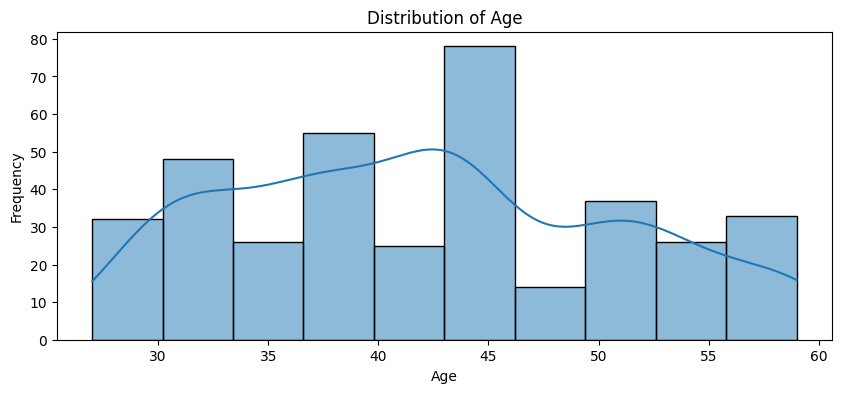

In [29]:
df = pd.read_csv('./sleep_health.csv')

# Plot distribution for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

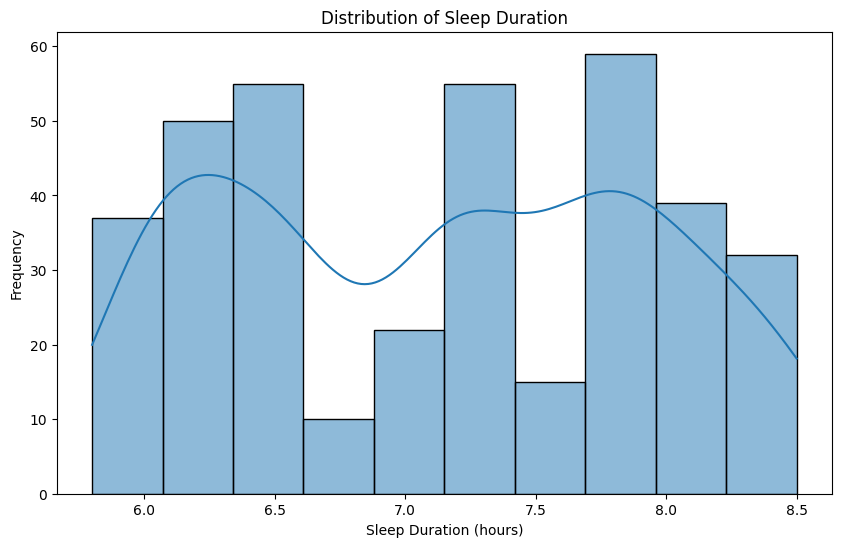

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep Duration'], kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

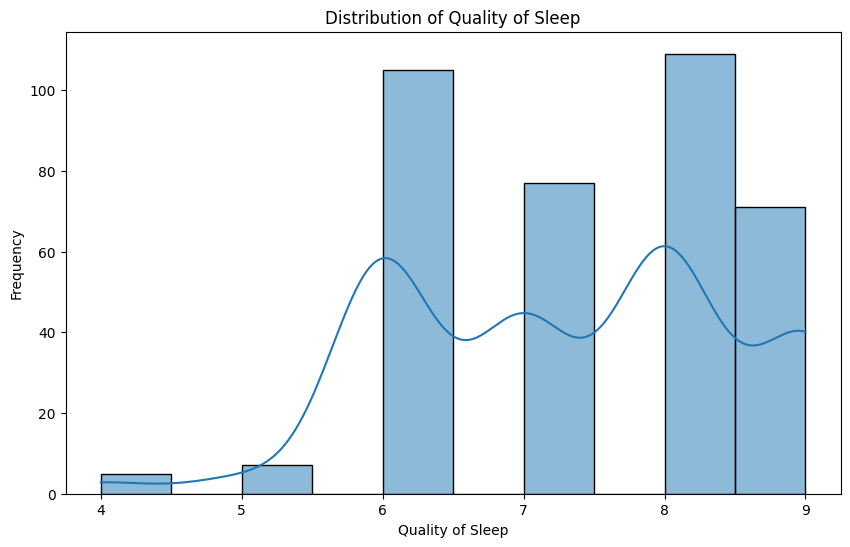

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Quality of Sleep'], kde=True)
plt.title('Distribution of Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

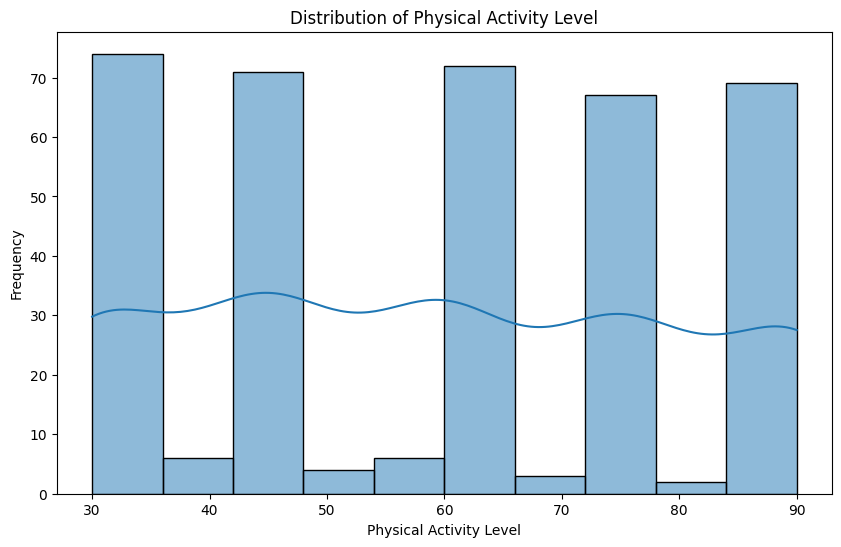

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Physical Activity Level'], kde=True)
plt.title('Distribution of Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

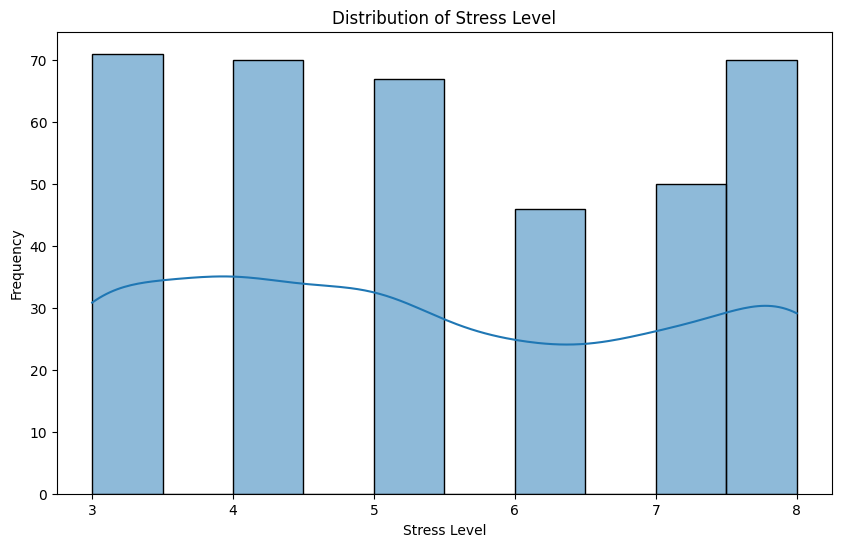

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Stress Level'], kde=True)
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

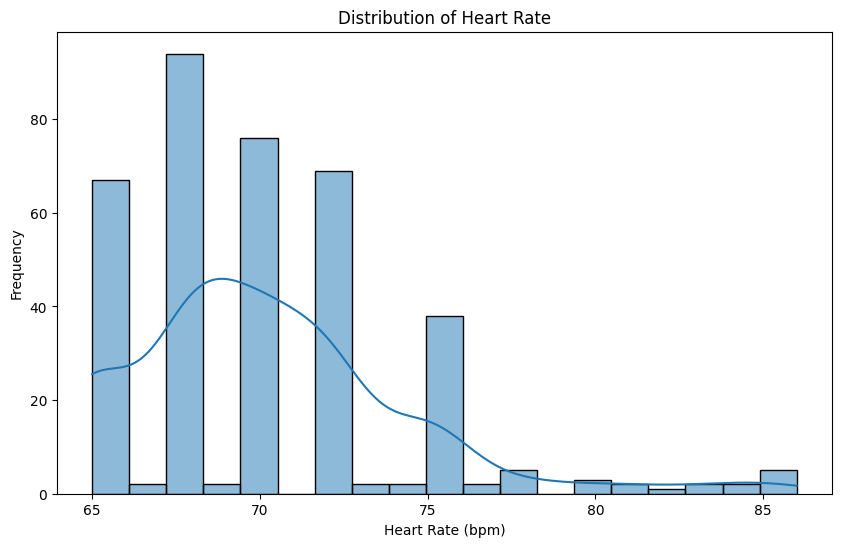

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Heart Rate'], kde=True)
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

2

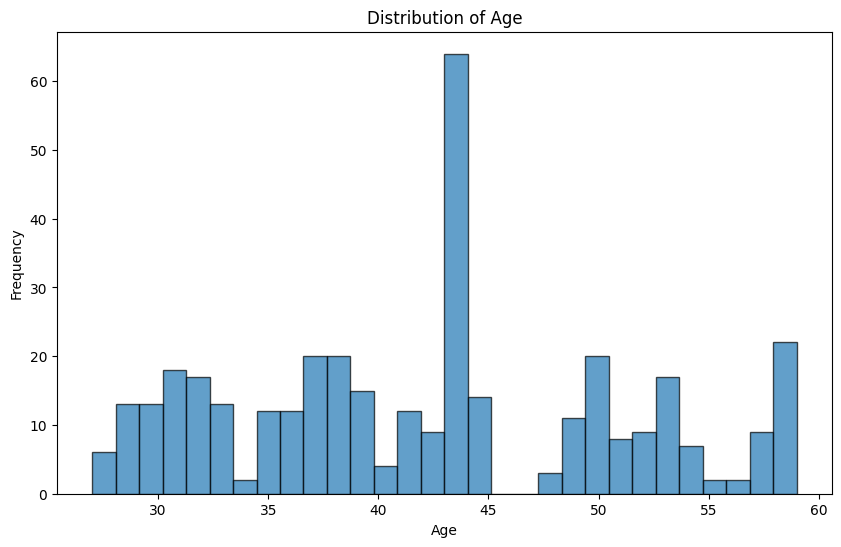

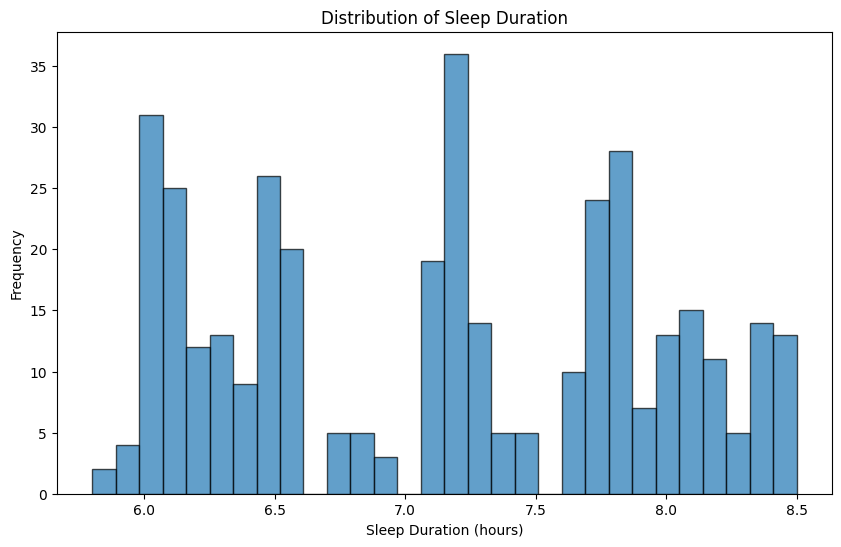

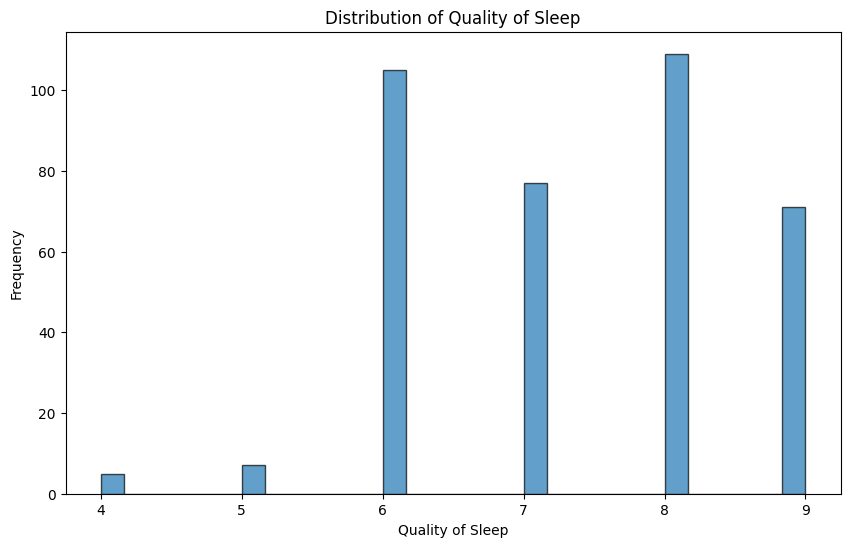

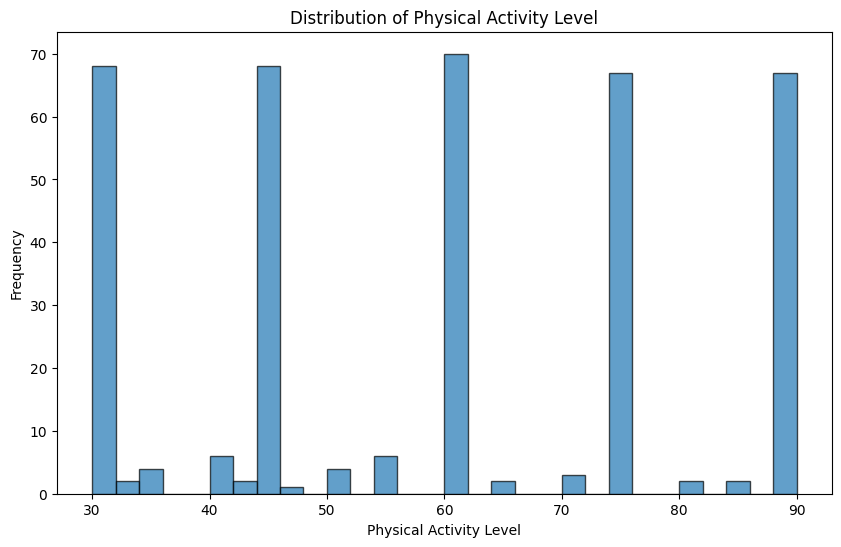

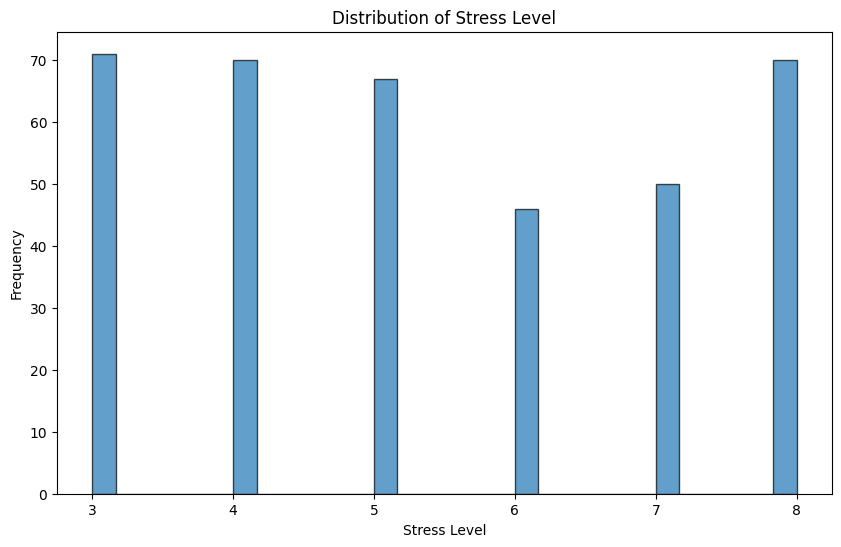

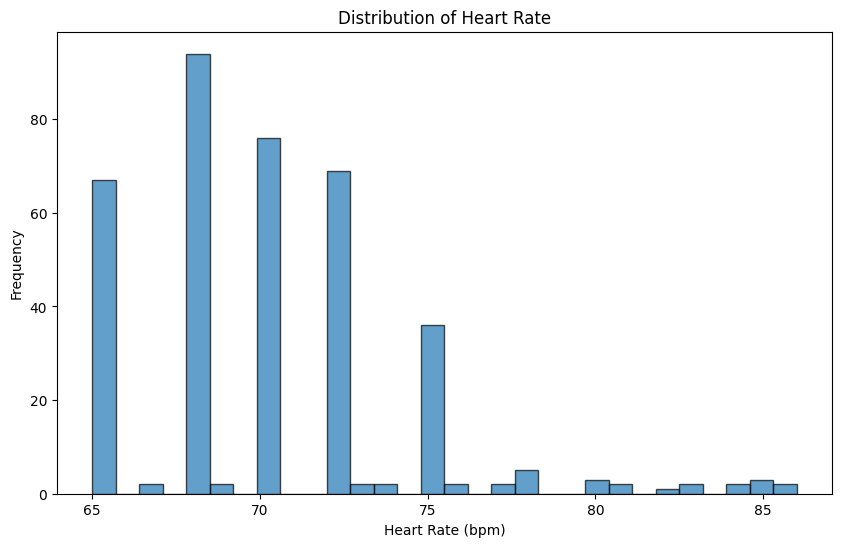

In [37]:
data = np.genfromtxt('./sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)

# Plot distribution for Age
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot distribution for Sleep Duration
plt.figure(figsize=(10, 6))
plt.hist(data['Sleep_Duration'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# Plot distribution for Quality of Sleep
plt.figure(figsize=(10, 6))
plt.hist(data['Quality_of_Sleep'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

# Plot distribution for Physical Activity Level
plt.figure(figsize=(10, 6))
plt.hist(data['Physical_Activity_Level'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

# Plot distribution for Stress Level
plt.figure(figsize=(10, 6))
plt.hist(data['Stress_Level'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

# Plot distribution for Heart Rate
plt.figure(figsize=(10, 6))
plt.hist(data['Heart_Rate'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

3

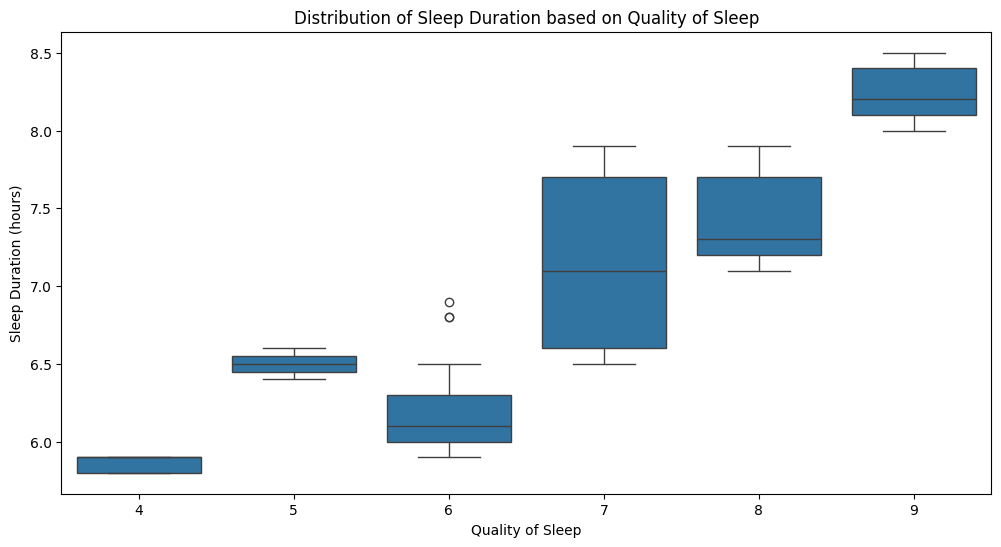

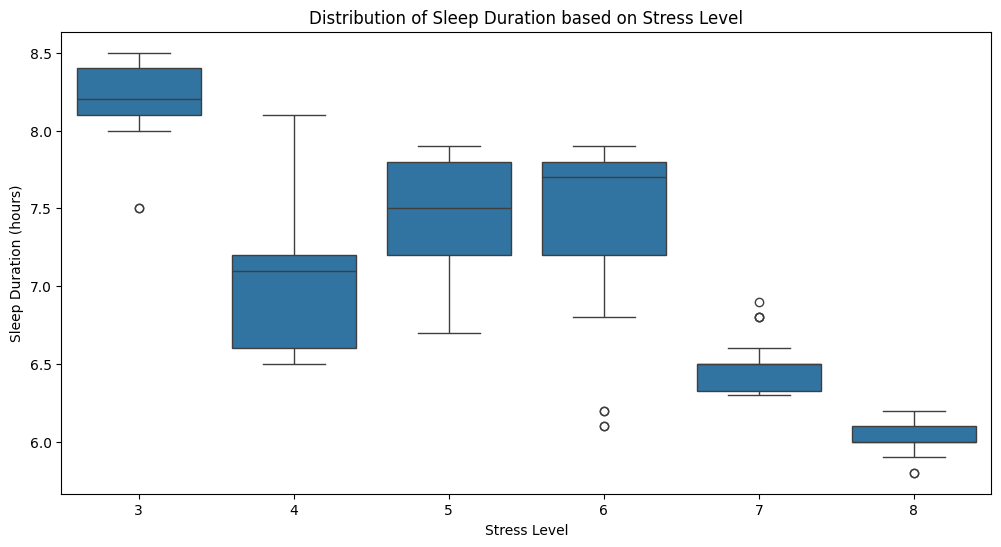

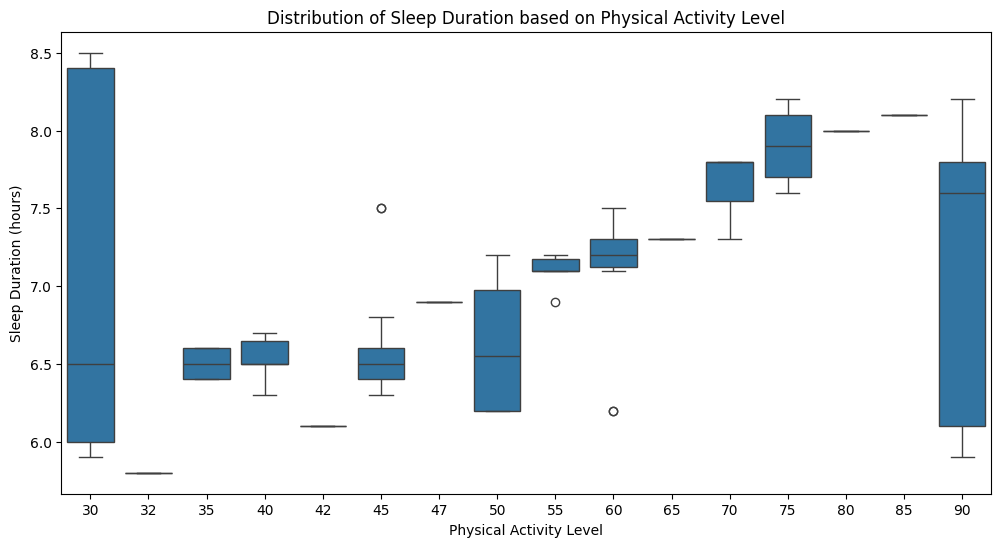

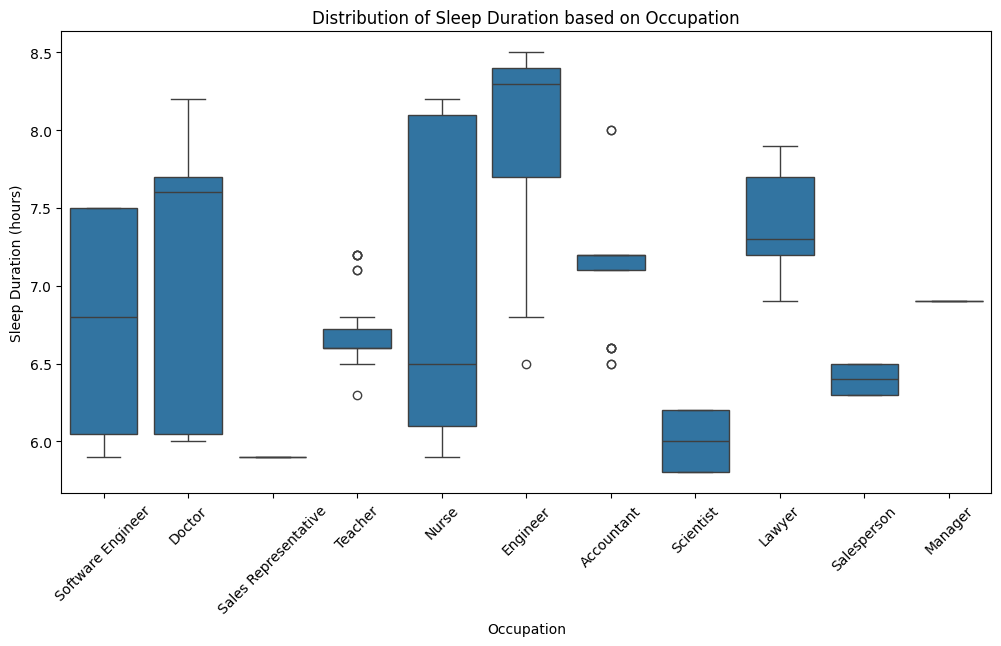

ValueError: Could not interpret value `BMI` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [38]:
df = pd.read_csv('./sleep_health.csv')

# Plot distribution of 'Sleep Duration' based on 'Quality of Sleep'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=df)
plt.title('Distribution of Sleep Duration based on Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# Plot distribution of 'Sleep Duration' based on 'Stress Level'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Stress Level', y='Sleep Duration', data=df)
plt.title('Distribution of Sleep Duration based on Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# Plot distribution of 'Sleep Duration' based on 'Physical Activity Level'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=df)
plt.title('Distribution of Sleep Duration based on Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# Plot distribution of 'Sleep Duration' based on 'Occupation'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
plt.title('Distribution of Sleep Duration based on Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of 'Sleep Duration' based on 'BMI'
plt.figure(figsize=(12, 6))
sns.boxplot(x='BMI', y='Sleep Duration', data=df)
plt.title('Distribution of Sleep Duration based on BMI')
plt.xlabel('BMI')
plt.ylabel('Sleep Duration (hours)')
plt.show()

4

C:\Users\Charles\AppData\Local\Temp\ipykernel_5164\3748508844.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sleep_duration_by_quality, labels=unique_quality)


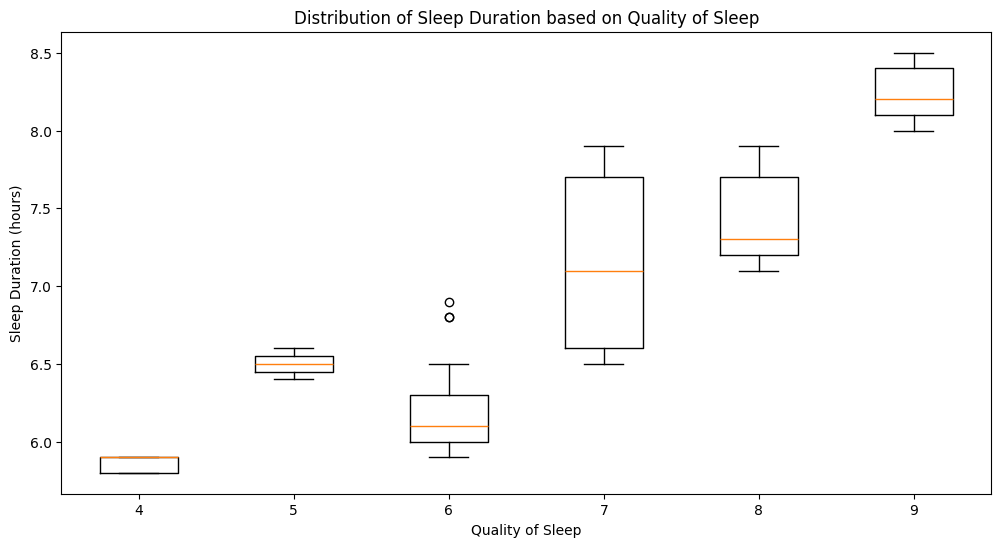

C:\Users\Charles\AppData\Local\Temp\ipykernel_5164\3748508844.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sleep_duration_by_stress, labels=unique_stress)


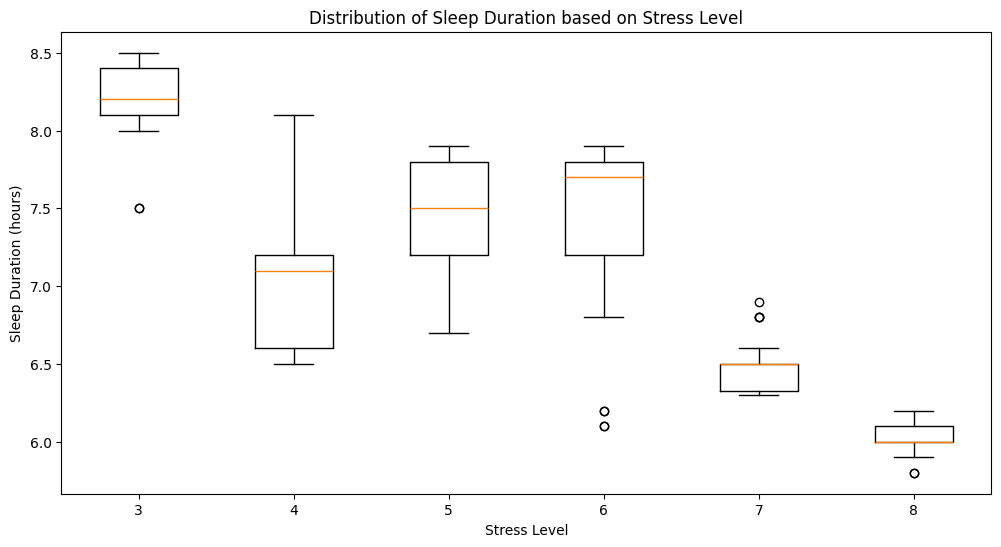

C:\Users\Charles\AppData\Local\Temp\ipykernel_5164\3748508844.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sleep_duration_by_activity, labels=unique_activity)


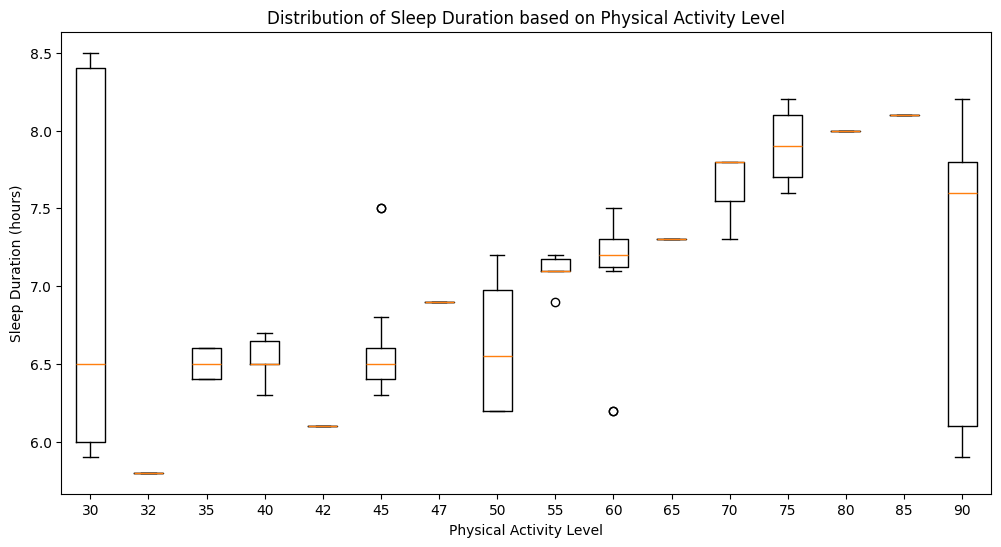

C:\Users\Charles\AppData\Local\Temp\ipykernel_5164\3748508844.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sleep_duration_by_occupation, labels=unique_occupation)


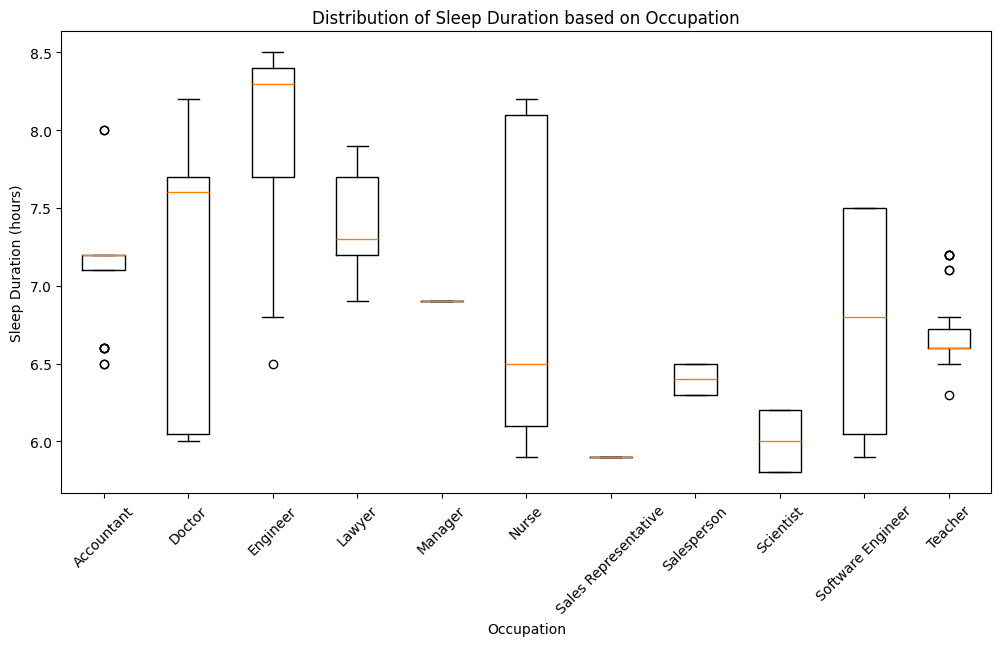

ValueError: no field of name BMI

In [40]:
data = np.genfromtxt('./sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)

# Plot distribution of 'Sleep Duration' based on 'Quality of Sleep'
quality_of_sleep = data['Quality_of_Sleep']
sleep_duration = data['Sleep_Duration']
unique_quality = np.unique(quality_of_sleep)
sleep_duration_by_quality = [sleep_duration[quality_of_sleep == q] for q in unique_quality]

plt.figure(figsize=(12, 6))
plt.boxplot(sleep_duration_by_quality, labels=unique_quality)
plt.title('Distribution of Sleep Duration based on Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# Plot distribution of 'Sleep Duration' based on 'Stress Level'
stress_level = data['Stress_Level']
unique_stress = np.unique(stress_level)
sleep_duration_by_stress = [sleep_duration[stress_level == s] for s in unique_stress]

plt.figure(figsize=(12, 6))
plt.boxplot(sleep_duration_by_stress, labels=unique_stress)
plt.title('Distribution of Sleep Duration based on Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# Plot distribution of 'Sleep Duration' based on 'Physical Activity Level'
physical_activity_level = data['Physical_Activity_Level']
unique_activity = np.unique(physical_activity_level)
sleep_duration_by_activity = [sleep_duration[physical_activity_level == a] for a in unique_activity]

plt.figure(figsize=(12, 6))
plt.boxplot(sleep_duration_by_activity, labels=unique_activity)
plt.title('Distribution of Sleep Duration based on Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# Plot distribution of 'Sleep Duration' based on 'Occupation'
occupation = data['Occupation']
unique_occupation = np.unique(occupation)
sleep_duration_by_occupation = [sleep_duration[occupation == o] for o in unique_occupation]

plt.figure(figsize=(12, 6))
plt.boxplot(sleep_duration_by_occupation, labels=unique_occupation)
plt.title('Distribution of Sleep Duration based on Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of 'Sleep Duration' based on 'BMI'
bmi = data['BMI']
unique_bmi = np.unique(bmi)
sleep_duration_by_bmi = [sleep_duration[bmi == b] for b in unique_bmi]

plt.figure(figsize=(12, 6))
plt.boxplot(sleep_duration_by_bmi, labels=unique_bmi)
plt.title('Distribution of Sleep Duration based on BMI')
plt.xlabel('BMI')
plt.ylabel('Sleep Duration (hours)')
plt.show()

5

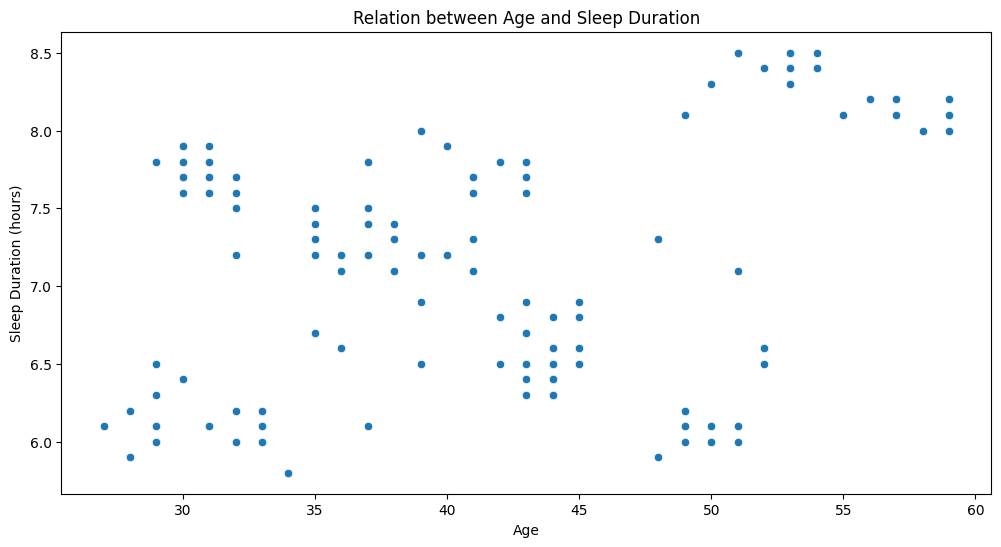

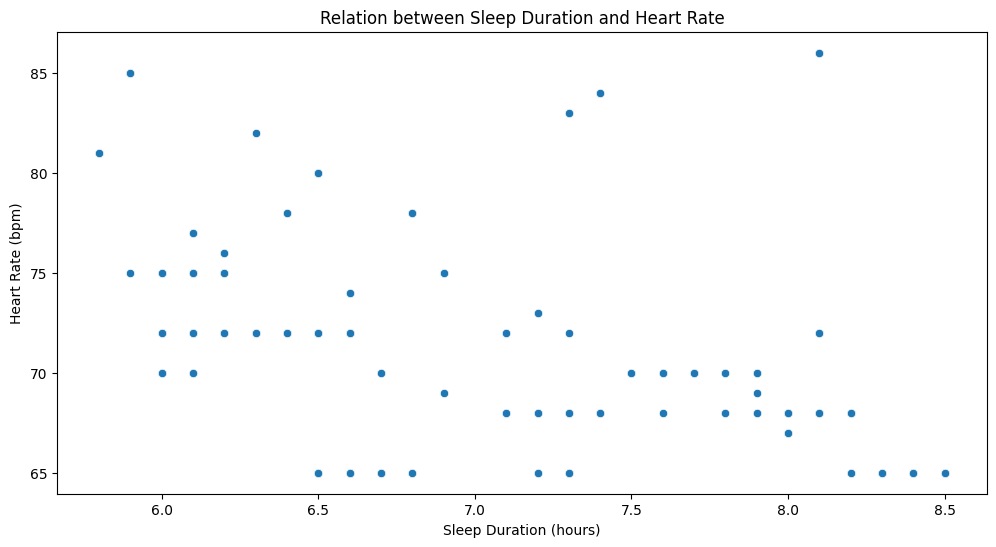

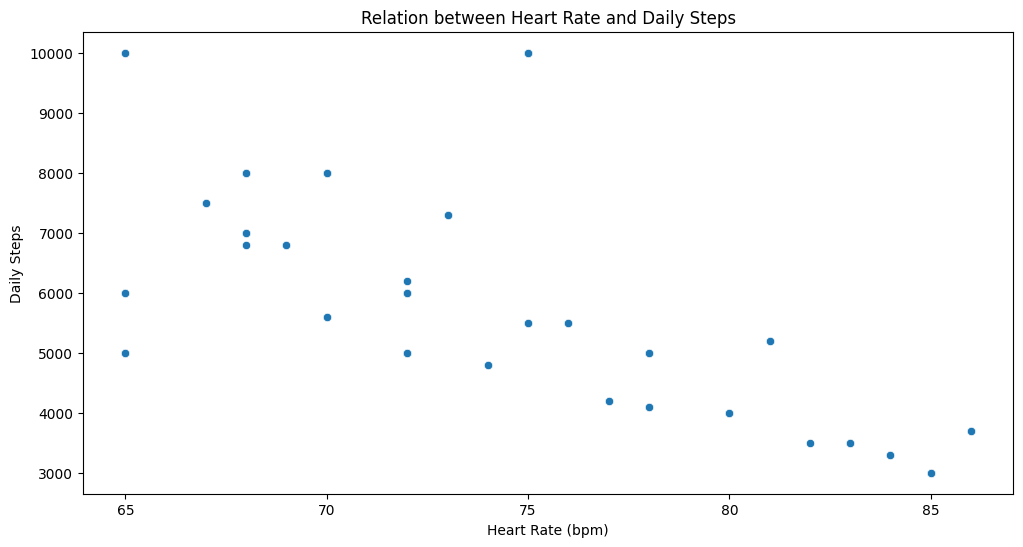

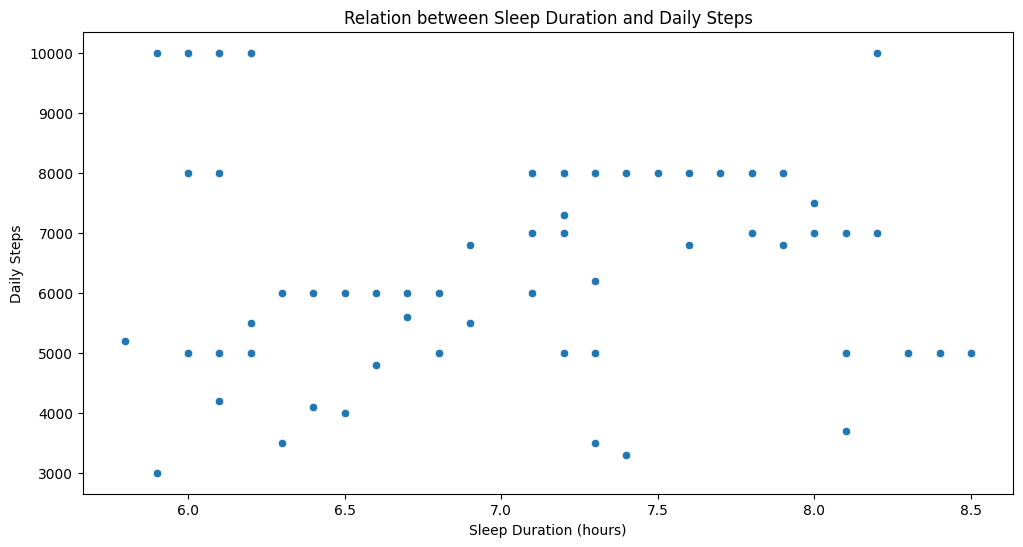

In [41]:
df = pd.read_csv('./sleep_health.csv')

# Plot relation between Age and Sleep Duration
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Sleep Duration', data=df)
plt.title('Relation between Age and Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# Plot relation between Sleep Duration and Heart Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sleep Duration', y='Heart Rate', data=df)
plt.title('Relation between Sleep Duration and Heart Rate')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Heart Rate (bpm)')
plt.show()

# Plot relation between Heart Rate and Daily Steps
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Heart Rate', y='Daily Steps', data=df)
plt.title('Relation between Heart Rate and Daily Steps')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')
plt.show()

# Plot relation between Sleep Duration and Daily Steps
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sleep Duration', y='Daily Steps', data=df)
plt.title('Relation between Sleep Duration and Daily Steps')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Daily Steps')
plt.show()

6

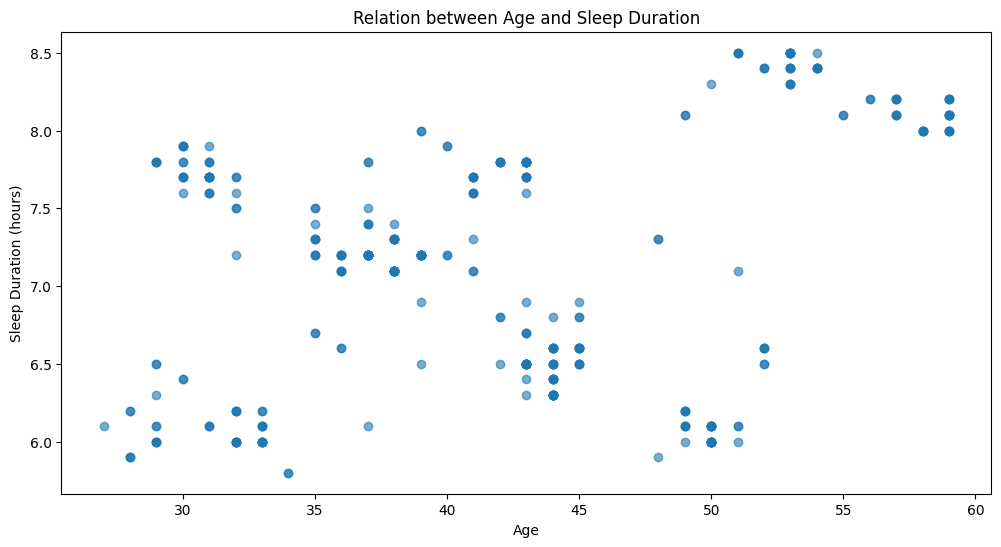

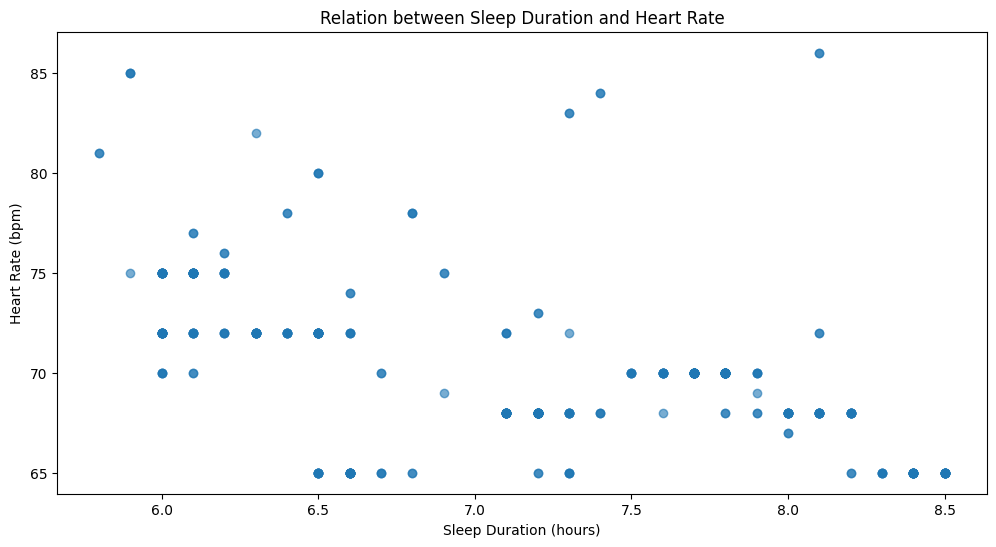

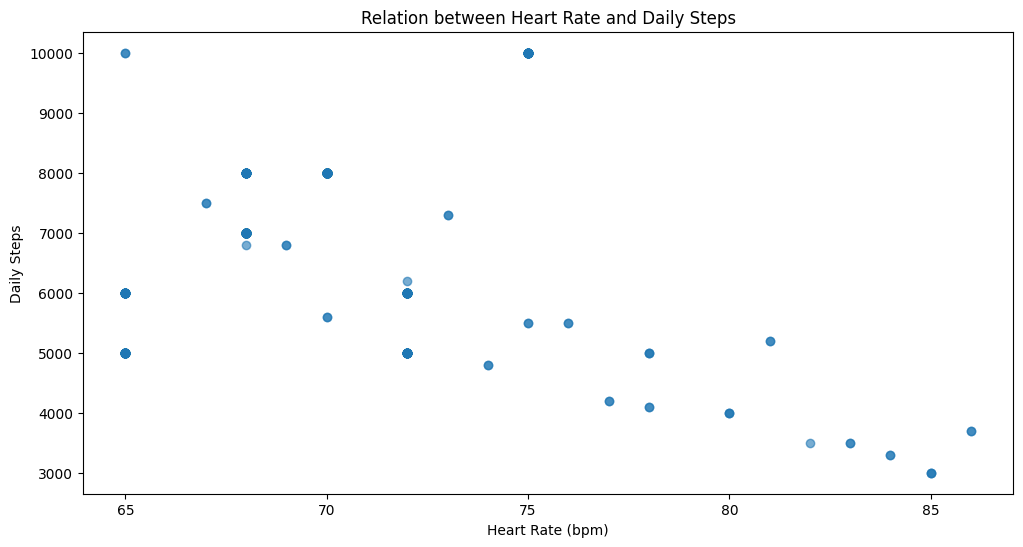

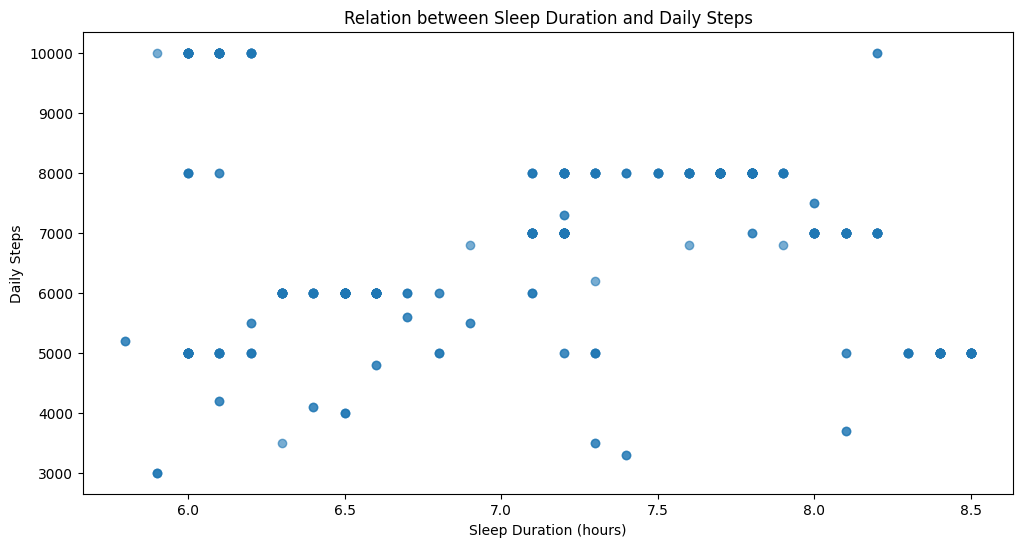

In [42]:
data = np.genfromtxt('./sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)

# Plot relation between Age and Sleep Duration
plt.figure(figsize=(12, 6))
plt.scatter(data['Age'], data['Sleep_Duration'], alpha=0.6)
plt.title('Relation between Age and Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# Plot relation between Sleep Duration and Heart Rate
plt.figure(figsize=(12, 6))
plt.scatter(data['Sleep_Duration'], data['Heart_Rate'], alpha=0.6)
plt.title('Relation between Sleep Duration and Heart Rate')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Heart Rate (bpm)')
plt.show()

# Plot relation between Heart Rate and Daily Steps
plt.figure(figsize=(12, 6))
plt.scatter(data['Heart_Rate'], data['Daily_Steps'], alpha=0.6)
plt.title('Relation between Heart Rate and Daily Steps')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')
plt.show()

# Plot relation between Sleep Duration and Daily Steps
plt.figure(figsize=(12, 6))
plt.scatter(data['Sleep_Duration'], data['Daily_Steps'], alpha=0.6)
plt.title('Relation between Sleep Duration and Daily Steps')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Daily Steps')
plt.show()

AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



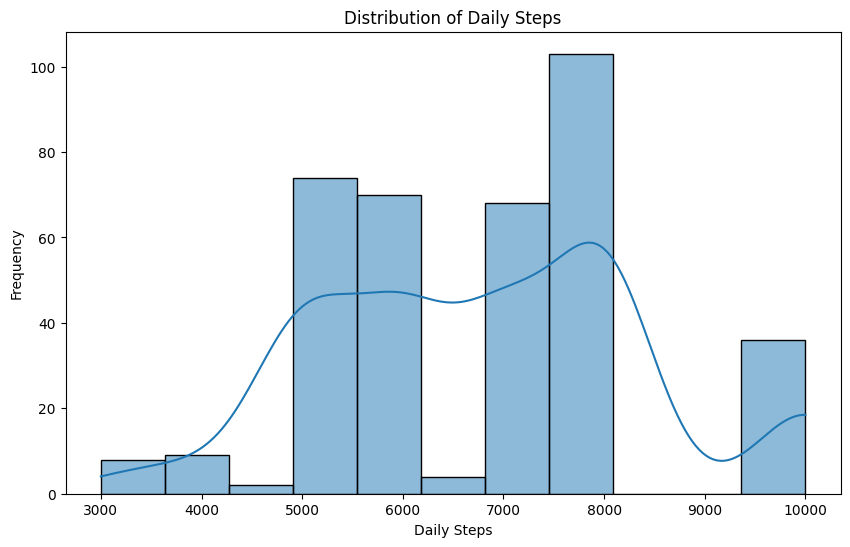

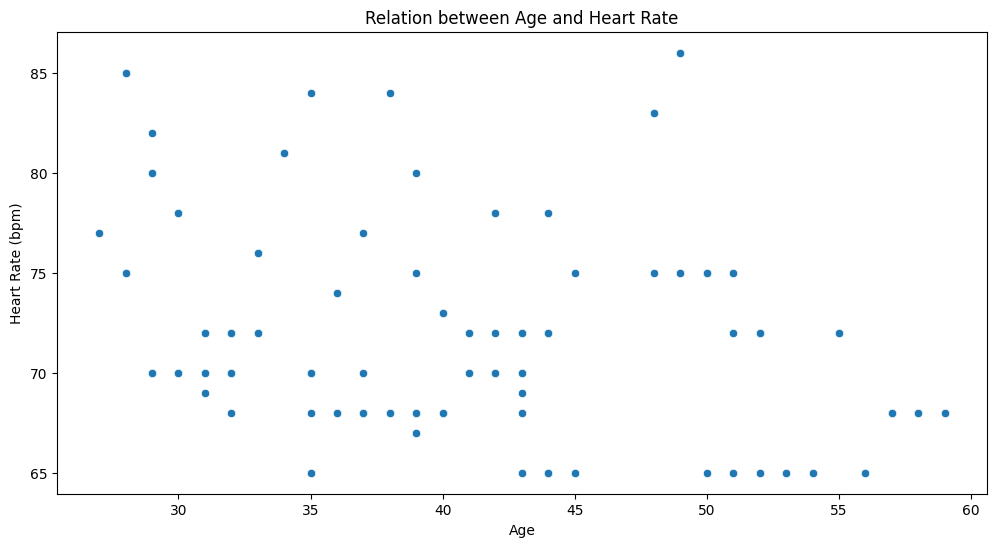

ValueError: Could not interpret value `BMI` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./sleep_health.csv')

# Plot distribution of 'Daily Steps'
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Steps'], kde=True)
plt.title('Distribution of Daily Steps')
plt.xlabel('Daily Steps')
plt.ylabel('Frequency')
plt.show()

# Plot relation between 'Age' and 'Heart Rate'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Heart Rate', data=df)
plt.title('Relation between Age and Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate (bpm)')
plt.show()

# Plot relation between 'BMI' and 'Heart Rate'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='BMI', y='Heart Rate', data=df)
plt.title('Relation between BMI and Heart Rate')
plt.xlabel('BMI')
plt.ylabel('Heart Rate (bpm)')
plt.show()

# Plot relation between 'Stress Level' and 'Heart Rate'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Stress Level', y='Heart Rate', data=df)
plt.title('Relation between Stress Level and Heart Rate')
plt.xlabel('Stress Level')
plt.ylabel('Heart Rate (bpm)')
plt.show()

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.genfromtxt('./sleep_health.csv', delimiter=',', skip_header=1, names=True, dtype=None, encoding='utf-8')

# Plot distribution of 'Daily Steps'
plt.figure(figsize=(10, 6))
plt.hist(data['Daily_Steps'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Daily Steps')
plt.xlabel('Daily Steps')
plt.ylabel('Frequency')
plt.show()

# Plot relation between 'Age' and 'Heart Rate'
plt.figure(figsize=(12, 6))
plt.scatter(data['Age'], data['Heart_Rate'], alpha=0.6)
plt.title('Relation between Age and Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate (bpm)')
plt.show()

# Plot relation between 'BMI' and 'Heart Rate'
plt.figure(figsize=(12, 6))
plt.scatter(data['BMI'], data['Heart_Rate'], alpha=0.6)
plt.title('Relation between BMI and Heart Rate')
plt.xlabel('BMI')
plt.ylabel('Heart Rate (bpm)')
plt.show()

# Plot relation between 'Stress Level' and 'Heart Rate'
plt.figure(figsize=(12, 6))
plt.scatter(data['Stress_Level'], data['Heart_Rate'], alpha=0.6)
plt.title('Relation between Stress Level and Heart Rate')
plt.xlabel('Stress Level')
plt.ylabel('Heart Rate (bpm)')
plt.show()

ValueError: no field of name Daily_Steps

<Figure size 1000x600 with 0 Axes>